<a href="https://colab.research.google.com/github/Nikhil14091997/ML-ZoomCamp/blob/main/Week_3_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1


```
What is the most frequent observation (mode) for the column 'neighbourhood_group'?

1. Split the data
2. Split your data in train/val/test sets, with 60%/20%/20% distribution.
3. Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
4. Make sure that the target value ('price') is not in your dataframe.
```



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'


In [ ]:
!wget $data -O New_York_City_Airbnb_Open_Data.csv

--2021-09-26 10:09:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘New_York_City_Airbnb_Open_Data.csv’

New_York_City_Airbn 100%[===================>]   6.75M  --.-KB/s    in 0.06s   

2021-09-26 10:09:51 (122 MB/s) - ‘New_York_City_Airbnb_Open_Data.csv’ saved [7077973/7077973]



In [ ]:
df = pd.read_csv('data-week-3-homework.csv')

In [ ]:
len(df)

48895

In [ ]:
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.6475,40.7536,40.809,40.6851,40.7985
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
features = ['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df = df[features]

In [ ]:
# Searching features with null values
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['reviews_per_month'] = df.reviews_per_month.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [ ]:
len(df)

48895

In [ ]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [ ]:
0.60*48895

29337.0

In [ ]:
0.20 * 48895

9779.0

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [ ]:
# Verify the lenght of partitions 
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [ ]:
y_train

array([ 99,  57,  70, ..., 299,  65,  92])

In [ ]:
df_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Entire home/apt,40.72760,-73.94495,3,29,0.70,13,50
1,Manhattan,Private room,40.70847,-74.00498,1,0,0.00,1,7
2,Bronx,Entire home/apt,40.83149,-73.92766,40,0,0.00,1,0
3,Brooklyn,Entire home/apt,40.66448,-73.99407,2,3,0.08,1,0
4,Manhattan,Private room,40.74118,-74.00012,1,48,1.80,2,67
...,...,...,...,...,...,...,...,...,...
29332,Brooklyn,Private room,40.71748,-73.95685,6,5,0.13,1,0
29333,Brooklyn,Private room,40.66397,-73.98538,1,7,0.17,2,0
29334,Manhattan,Private room,40.79994,-73.97001,1,1,0.64,1,88
29335,Brooklyn,Private room,40.69585,-73.96344,60,0,0.00,1,0


In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
# getting the missing values from the data 
df_full_train.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
from IPython.display import display

In [ ]:
# What is the most frequent observation (mode) for the column 'neighbourhood_group'?
df_full_train.neighbourhood_group.value_counts(normalize=False)


Manhattan        17380
Brooklyn         16096
Queens            4482
Bronx              864
Staten Island      294
Name: neighbourhood_group, dtype: int64

In [ ]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

QUestion 1 : Manhattan

# Question 2


*   Create the correlation matrix for the numerical features of your train dataset.
    *   In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.


*   What are the two features that have the biggest correlation in this dataset?
**Make price binary**

*   We need to turn the price variable from numeric into binary.
*   Let's create a variable above_average which is 1 if the price is above (or equal to) 152.







In [ ]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
categorical = ["neighbourhood_group", "room_type"]
numerical = ['latitude','longitude', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [ ]:
categorical

['neighbourhood_group', 'room_type']

In [ ]:
# Create the correlation matrix for the numerical features of your train dataset
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.00,0.08,0.03,-0.01,-0.01,0.02,-0.01
longitude,0.08,1.00,-0.06,0.06,0.13,-0.12,0.08
minimum_nights,0.03,-0.06,1.00,-0.08,-0.12,0.12,0.14
number_of_reviews,-0.01,0.06,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,-0.01,0.13,-0.12,0.59,1.00,-0.05,0.17
calculated_host_listings_count,0.02,-0.12,0.12,-0.07,-0.05,1.00,0.23
availability_365,-0.01,0.08,0.14,0.17,0.17,0.23,1.00


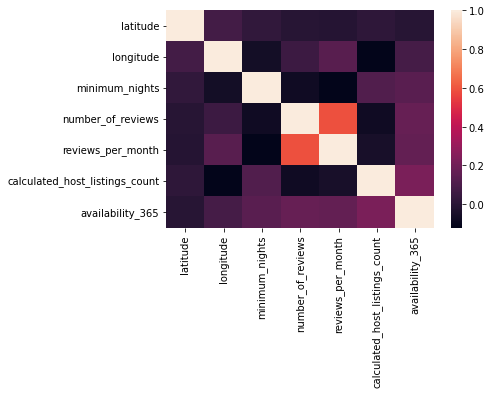

In [ ]:
sns.heatmap(corr)

In [ ]:
# What are the two features that have the biggest correlation in this dataset?
max_corr = -1
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] < 1.00 and  corr.iloc[i,j] > max_corr:
      max_corr = corr.iloc[i,j]
      print("Max corr is : ", max_corr, ' for :(', i,",", j, ")")

Max corr is :  0.08030088258320403  for :( 0 , 1 )
Max corr is :  0.13464215986454384  for :( 1 , 4 )
Max corr is :  0.13890125161845288  for :( 2 , 6 )
Max corr is :  0.5903739015971261  for :( 3 , 4 )


In [ ]:
y_train.max()

10000

In [ ]:
# Make price binary*
# We need to turn the price variable from numeric into binary.
def make_binary(series):
  series = series.copy()
  for i in range(len(series)):
   series[i] = np.binary_repr(series[i])
  return series


In [ ]:
y_train_binary = make_binary(y_train)

In [ ]:
y_train[:5]


array([ 99,  57,  70, 130, 110])

In [ ]:
y_train_binary[:5]

array([ 1100011,   111001,  1000110, 10000010,  1101110])

In [ ]:
# Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

# Obtain binarized prices for all datasets 
bin_price_val = (y_val >= 152).astype(int)
bin_price_train = (y_train >= 152).astype(int)
bin_price_test = (y_test >= 152).astype(int)

# Question 3

*   Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
*   Which of these two variables has bigger score?


*   Round it to 2 decimal digits using round(score, 2)








In [ ]:
from sklearn.metrics import mutual_info_score
def calculate_mutual_information(series):
  return np.round(mutual_info_score(series, bin_price_train), 2)


In [ ]:
mi = df_train[categorical].apply(calculate_mutual_information)
mi.sort_values(ascending = False)

room_type              0.14
neighbourhood_group    0.05
dtype: float64



```
Answer: room_type variable has the bigger mutual information score.
```



# Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
  * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  * model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
X_train

array([[ 50.     ,  13.     ,  40.7276 , ...,   1.     ,   0.     ,
          0.     ],
       [  7.     ,   1.     ,  40.70847, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.83149, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [ 88.     ,   1.     ,  40.79994, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.69585, ...,   0.     ,   1.     ,
          0.     ],
       [281.     ,   2.     ,  40.64438, ...,   1.     ,   0.     ,
          0.     ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, bin_price_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predictions on the validation dataset 
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
y_pred[:10]

array([0.02879082, 0.59585524, 0.42623594, 0.07493569, 0.81180978,
       0.33195823, 0.68563097, 0.54104382, 0.07675181, 0.60833048])

In [ ]:
# probablity cutoff 
prob = (y_pred >= 0.5)

In [ ]:
prob

array([False,  True, False, ..., False, False,  True])

In [ ]:
accuracy = round((bin_price_val == prob).mean(), 2)
accuracy

0.79

Accuracy for validation dataset is : 79% 

# Question 5



```
We have 9 features: 7 numerical features and 2 categorical.
1. Let's find the least useful one using the feature elimination technique.
2. Train a model with all these features (using the same parameters as in Q4).
3. Now exclude each feature from this set and train a model without it. 
4. Record the accuracy for each model.
5. For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
6. Which of following feature has the smallest difference?
    neighbourhood_group
    room_type
    number_of_reviews
    reviews_per_month
```



In [ ]:
elimination = ['neighbourhood_group', 'room_type', 'number_of_reviews', 'reviews_per_month']
for feature in elimination:
  df_train_temp = df_train.drop(feature, axis = 1)
  train_dict_temp = df_train_temp.to_dict(orient = 'records')
  dv_temp = DictVectorizer()
  X_train_temp = dv_temp.fit_transform(train_dict_temp)

  model.fit(X_train_temp, bin_price_train)

  df_val_temp = df_val.drop(feature, 1)
  val_dict_temp = df_val_temp.to_dict(orient = 'records')
  X_val_temp = dv_temp.fit_transform(val_dict_temp)

  y_pred_temp = model.predict(X_val_temp)
  prob_temp = (y_pred_temp >= 0.5)

  accuracy_temp = (bin_price_val == prob_temp).mean()
  diff_accuracy = abs(accuracy - accuracy_temp)

  print("Removing : ", feature, " yeilds difference of: ", round(diff_accuracy, 4))


Removing :  neighbourhood_group  yeilds difference of:  0.0401
Removing :  room_type  yeilds difference of:  0.0614
Removing :  number_of_reviews  yeilds difference of:  0.0012
Removing :  reviews_per_month  yeilds difference of:  0.0008


Removing :  reviews_per_month  yeilds difference of:  0.0008
Which is the samllest in the four elimination features

# Question 6


```
For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.
```



In [ ]:
# We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [ ]:
# Fit the Ridge regression model on the training data.
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
alphas = [0, 0.01, 0.1, 1, 10]
for i in alphas:
  model_ridge = Ridge(alpha = i)
  # Fit the Ridge regression model on the training data.
  model_ridge.fit(X_train, y_train_log)
  y_pred_ridge = model_ridge.predict(X_val) 
  rmse = np.sqrt(mean_squared_error(y_val_log, y_pred_ridge))
  # Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
  print("For alpha = ", i, " RMSE is ->", round(rmse, 3))

For alpha =  0  RMSE is -> 0.497
For alpha =  0.01  RMSE is -> 0.497
For alpha =  0.1  RMSE is -> 0.497
For alpha =  1  RMSE is -> 0.497
For alpha =  10  RMSE is -> 0.498




```
Here we have multiple options like 
0, 0.1, 0.01, 1 -> all yeild same RMSE
hence the smallest one is 0.01
```

